# 검증

## t,z 검증

In [1]:
import pandas as pd
from scipy import stats

#data
data = pd.read_csv('./data/Titanic_data.csv')

In [2]:
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
#남성승객, 여성승객 생존여부 dataframe
male = data[data['Sex']=='male']
female = data[data['Sex']=='female']
print(male)

     PassengerId  Survived  Pclass                            Name   Sex  \
0              1         0       3         Braund, Mr. Owen Harris  male   
4              5         0       3        Allen, Mr. William Henry  male   
5              6         0       3                Moran, Mr. James  male   
6              7         0       1         McCarthy, Mr. Timothy J  male   
7              8         0       3  Palsson, Master. Gosta Leonard  male   
..           ...       ...     ...                             ...   ...   
883          884         0       2   Banfield, Mr. Frederick James  male   
884          885         0       3          Sutehall, Mr. Henry Jr  male   
886          887         0       2           Montvila, Rev. Juozas  male   
889          890         1       1           Behr, Mr. Karl Howell  male   
890          891         0       3             Dooley, Mr. Patrick  male   

      Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    22.0      1   

In [4]:
#각 데이터프레임 새존여부 평균
male_sur_rate = male['Survived'].mean()
female_sur_rate = female['Survived'].mean()
print("male 생존확률: {} \nfemale 생존확률: {}".format(male_sur_rate, female_sur_rate))

male 생존확률: 0.18890814558058924 
female 생존확률: 0.7420382165605095


In [5]:
# t-검정

t,p = stats.ttest_ind(male['Survived'], female['Survived'])

#유의수준 alpha와 비교해서 기각 여부 결정
alpha = 0.5
if p< alpha:
    print(f"p-value: {p:.4f}, 귀무 가설 기각")
else:
    print(f"p-value: {p:.4f}, 귀무 가설 채택")



p-value: 0.0000, 귀무 가설 기각


## 카이제곱 검증

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Create data
data = {
    'Gender': ["M", "M","M","M","F","F","F","F"],
    'Smoker': ["Y","N","N","N","Y","Y","N","N"],
    'Count' : [20,80,40,60,20,160,80,120]
}

df = pd.DataFrame(data)
print(df)

  Gender Smoker  Count
0      M      Y     20
1      M      N     80
2      M      N     40
3      M      N     60
4      F      Y     20
5      F      Y    160
6      F      N     80
7      F      N    120


In [7]:
#df로 분할표 생성
table = pd.pivot_table(df, values='Count',index='Gender', columns='Smoker')
print(table)

Smoker    N   Y
Gender         
F       100  90
M        60  20


In [8]:
#chi2_contingency
stat, p, dof, expected =chi2_contingency(table)
alpha=0.04

print(p)
if p< alpha:
    print("귀무 가설 기각")
else:
    print("귀무 가설 채택")


0.0010377069926168323
귀무 가설 기각


## 일월분석 one-wayb ANOVA

한개의 독립변수를 가짐

In [9]:
#Create data
import numpy as np
np.random.seed(1)   #random수가 고정되게

data= {
    "A": np.random.randint(1,6,10),
    "B": np.random.randint(1,6,10),
    "C": np.random.randint(1,6,10)
}
df = pd.DataFrame(data)
print(df)

   A  B  C
0  4  2  5
1  5  3  2
2  1  5  2
3  2  3  1
4  4  5  2
5  1  4  2
6  1  5  2
7  2  3  2
8  5  5  1
9  5  3  5


In [10]:
from scipy.stats import f_oneway

In [11]:
f_stat, p_val = f_oneway(df['A'], df['B'], df['C'])
print("F-statistic: ", f_stat)
print("p-val: ",p_val)

F-statistic:  2.296551724137931
p-val:  0.11992643045704418


## 이원분석 Two-way ANOVA
독립변수 두개이상

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

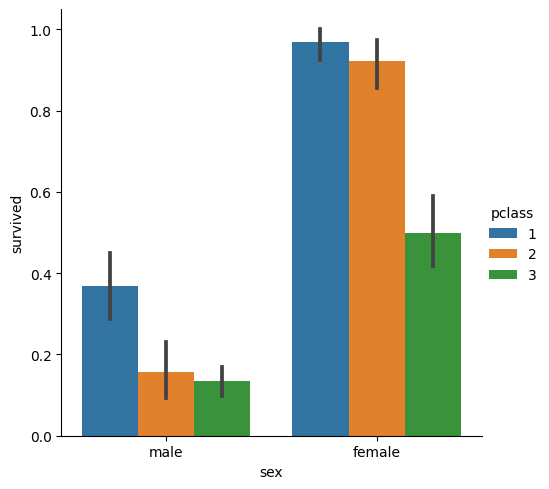

In [13]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# create two-way ANOVA model
model = ols('survived ~ C(sex) + C(pclass) + C(sex):C(pclass)', titanic).fit()

# 분석실행
anova_results = anova_lm(model, type=2)

# Visualize
sns.catplot(x='sex', y='survived', hue='pclass', data=titanic, kind='bar')

### 교호작용

Text(0.5, 1.0, 'Survival rate by sex and pclass')

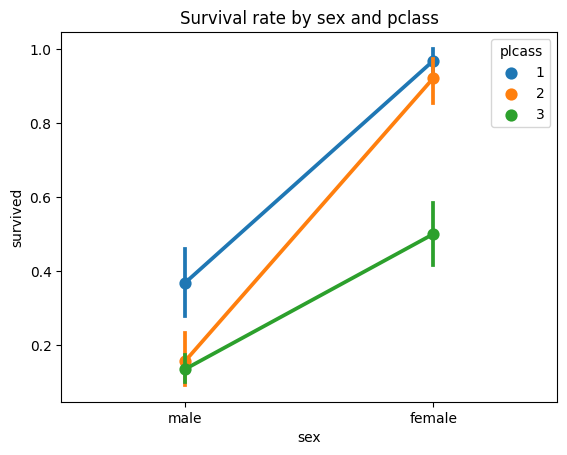

In [14]:
# Create a pointplot with Sex,Pclass, survived varialbes
sns.pointplot(x='sex', y='survived', hue='pclass', data=titanic)
plt.legend(title='plcass',loc='best')
plt.title('Survival rate by sex and pclass')

# 상관분석

In [15]:
tips_data = sns.load_dataset('tips')
print(tips_data)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [16]:
corr = tips_data[['total_bill','tip']].corr()
print(corr)

            total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

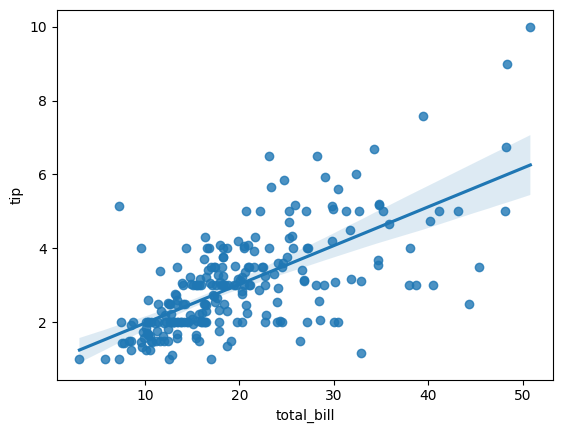

In [17]:
sns.regplot(x='total_bill', y='tip', data=tips_data)

In [18]:
corr_pearson = tips_data['total_bill'].corr(tips_data['tip'],method='pearson')
print('Pearson corr\n',corr)

Pearson corr
             total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000


## 공분산

In [19]:
covariance = tips_data['total_bill'].cov(tips_data['tip'])
print('Covariance corr', covariance)

Covariance corr 8.323501629224854


## 산점도 scatter plot
x축 독립변수, y종속변수

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

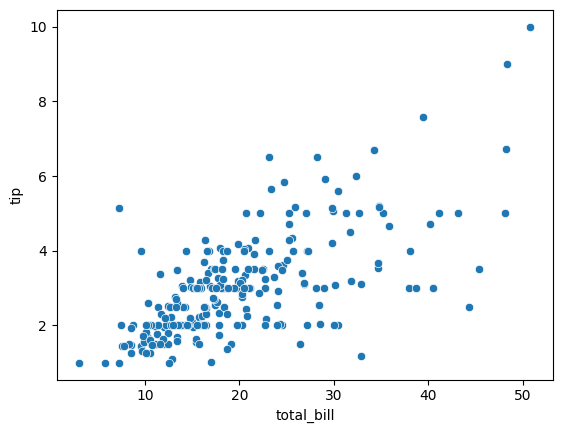

In [20]:
sns.scatterplot(x='total_bill', y='tip', data=tips_data)

## 상관분석 해석
- heatmap

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


<AxesSubplot:>

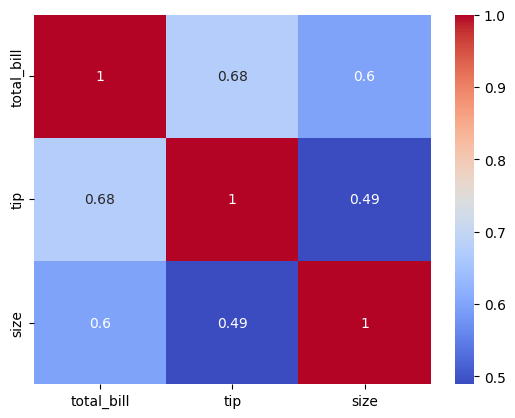

In [23]:
#tips

corr = tips_data.corr()
print(corr)

sns.heatmap(corr, annot=True, cmap='coolwarm')

# 선형/비선형

In [21]:
#linear
x_linear = np.linspace(0,10,100)
y_linear = 2*x_linear +1

#non linear
x_nonlinear = np.linspace(-10,10,100)
y_nonlinear = x_nonlinear**2

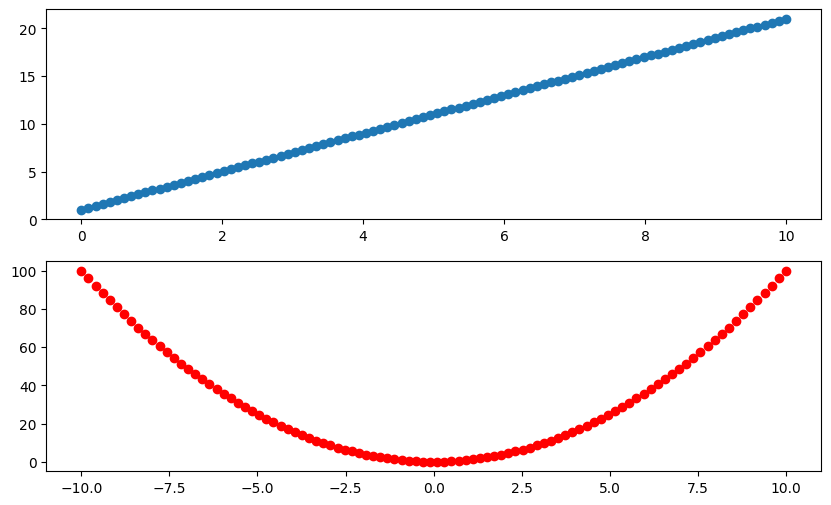

In [22]:
fig= plt.figure(figsize=(10,6))
#linear
ax1 = fig.add_subplot(211)
ax1.scatter(x_linear, y_linear)

#nonlinear
ax2 = fig.add_subplot(212)
ax2.scatter(x_nonlinear, y_nonlinear, color='r')

## 시리얼 상관분석
- 시간축으로 된 상관관계를 분석하는 것이므로 시간축의 정보 필수

In [32]:
import pandas as pd
import random

# Create Samgsung data
dates = pd.date_range(start ='2021-01-04', periods=100, freq='D')
samsung_prices = [random.randint(80000,90000) for _ in range(100)]
samsung_data = {'Date': dates, '005930.KS':samsung_prices}
samsung_df = pd.DataFrame(samsung_data)
print(samsung_df)

         Date  005930.KS
0  2021-01-04      81840
1  2021-01-05      86126
2  2021-01-06      89921
3  2021-01-07      85330
4  2021-01-08      81704
..        ...        ...
95 2021-04-09      81051
96 2021-04-10      85409
97 2021-04-11      81635
98 2021-04-12      88097
99 2021-04-13      86415

[100 rows x 2 columns]


In [33]:
# Date -> index
samsung_df.set_index('Date', inplace=True)

In [34]:
print(samsung_df)

            005930.KS
Date                 
2021-01-04      81840
2021-01-05      86126
2021-01-06      89921
2021-01-07      85330
2021-01-08      81704
...               ...
2021-04-09      81051
2021-04-10      85409
2021-04-11      81635
2021-04-12      88097
2021-04-13      86415

[100 rows x 1 columns]


In [35]:
# Create LG data
lg_prices = [random.randint(80000,90000) for _ in range(100)]
lg_data = {'Date': dates, '066570.KS':lg_prices}
lg_df = pd.DataFrame(lg_data)
# date->index
lg_df.set_index('Date',inplace=True)

In [36]:
print(lg_df)

            066570.KS
Date                 
2021-01-04      86502
2021-01-05      87286
2021-01-06      85308
2021-01-07      85648
2021-01-08      85133
...               ...
2021-04-09      89120
2021-04-10      88549
2021-04-11      82985
2021-04-12      87436
2021-04-13      87360

[100 rows x 1 columns]


In [45]:
#samsung + lg
df = pd.concat([samsung_df, lg_df],axis=1)
df = df.loc[:, ['005930.KS','066570.KS']]
df.columns= ['Samsung','LG']

In [46]:
print(df)

            Samsung     LG
Date                      
2021-01-04    81840  86502
2021-01-05    86126  87286
2021-01-06    89921  85308
2021-01-07    85330  85648
2021-01-08    81704  85133
...             ...    ...
2021-04-09    81051  89120
2021-04-10    85409  88549
2021-04-11    81635  82985
2021-04-12    88097  87436
2021-04-13    86415  87360

[100 rows x 2 columns]


In [47]:
#폴더만들기
#os.makedirs('./data', exist_ok=True)

#CSV로 저장
df.to_csv('./data/stock_price.csv')

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import CSV
df = pd.read_csv('./data/stock_price.csv')
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)
print(df)

            Samsung     LG
Date                      
2021-01-04    81840  86502
2021-01-05    86126  87286
2021-01-06    89921  85308
2021-01-07    85330  85648
2021-01-08    81704  85133
...             ...    ...
2021-04-09    81051  89120
2021-04-10    85409  88549
2021-04-11    81635  82985
2021-04-12    88097  87436
2021-04-13    86415  87360

[100 rows x 2 columns]


In [50]:
#수익률 계산
returns = df.pct_change()
print(returns)

#맨 처음 NaN인 이유는 이전의 행의 값이 없기 때문이다

             Samsung        LG
Date                          
2021-01-04       NaN       NaN
2021-01-05  0.052370  0.009063
2021-01-06  0.044063 -0.022661
2021-01-07 -0.051056  0.003986
2021-01-08 -0.042494 -0.006013
...              ...       ...
2021-04-09 -0.002707  0.058106
2021-04-10  0.053769 -0.006407
2021-04-11 -0.044187 -0.062835
2021-04-12  0.079157  0.053636
2021-04-13 -0.019093 -0.000869

[100 rows x 2 columns]


In [61]:
corr_matrix = returns.corr()
print(corr_matrix)

          Samsung        LG
Samsung  1.000000 -0.055955
LG      -0.055955  1.000000


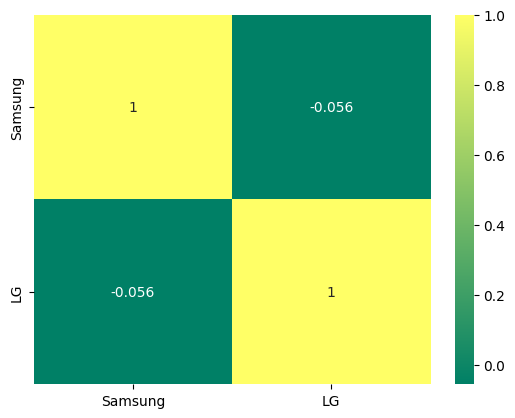

In [64]:
# heatmap
sns.heatmap(corr_matrix, annot=True, cmap='summer')
plt.show()